In [101]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.dates as mdates
from datetime import date
from datetime import timedelta, date
from yahoofinancials import YahooFinancials
from random import randint
import pandas_datareader as web
import numpy as np

1.	Depuis le site Yahoo Finance, téléchargez les prix des actions Apple (ticker : AAPL) du 01.01.2020 à aujourd’hui

In [102]:
ticker = "AAPL"
data = pd.DataFrame()
data[ticker] = web.DataReader(ticker, data_source = 'yahoo', 
                              start = "2020-01-01", 
                              end = "today")['Adj Close']

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 489 entries, 2020-01-02 to 2021-12-08
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    489 non-null    float64
dtypes: float64(1)
memory usage: 7.6 KB


In [104]:
data.head()

AAPL
Date                 
2020-01-02  73.988472
2020-01-03  73.269157
2020-01-06  73.852974
2020-01-07  73.505646
2020-01-08  74.688080

2.	Estimez les paramètres (valeur attendue, variance) des prix des actions, pour la sous-période 01.01.2020-28.02.2020

In [105]:
# Log Return
log_returns = np.log(1 + data.pct_change())
# Affichage de la fin du tableau
log_returns.tail()

AAPL
Date                
2021-12-02 -0.006149
2021-12-03 -0.011794
2021-12-06  0.021275
2021-12-07  0.034833
2021-12-08  0.019009

In [106]:
# Variance 
weight = np.array([0.25])
pfolio_var = round(np.dot(weight.T, np.dot(log_returns.cov()*250, weight)),2)
print("La variance du portefeuille est de " + str(pfolio_var*100) + str("%"))

La variance du portefeuille est de 1.0%


In [107]:
yf.multi

<module 'yfinance.multi' from 'C:\\Users\\Armel\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python39\\site-packages\\yfinance\\multi.py'>

3.	Générez 100 marches aléatoires pour les prix du 01.03.2021 à aujourd’hui

In [118]:
def marche(valprec):
    if(valprec == 0):
        return valprec+1
    value = randint(valprec-1,valprec+1)
    while(value == valprec):
        value = marche(valprec)
    return value


def initialize_marche():
    list_market = []
    list_market.append(0)
    
    for i in range(99):
        value = marche(list_market[i])
        if(value < 0):
            list_market.append(0)
        else:
            list_market.append(value)
    return list_market
    
initialize_marche()

[0,
 1,
 0,
 1,
 0,
 1,
 2,
 3,
 4,
 3,
 4,
 3,
 2,
 3,
 4,
 5,
 6,
 7,
 6,
 7,
 8,
 9,
 10,
 11,
 10,
 11,
 12,
 11,
 12,
 11,
 10,
 9,
 10,
 11,
 10,
 11,
 12,
 13,
 12,
 13,
 12,
 13,
 14,
 15,
 14,
 15,
 14,
 15,
 14,
 13,
 12,
 11,
 12,
 13,
 12,
 11,
 12,
 13,
 14,
 15,
 14,
 15,
 14,
 15,
 14,
 15,
 14,
 13,
 12,
 13,
 12,
 11,
 10,
 9,
 10,
 9,
 8,
 7,
 6,
 7,
 8,
 9,
 8,
 9,
 10,
 9,
 10,
 9,
 10,
 9,
 8,
 7,
 8,
 7,
 8,
 9,
 10,
 9,
 8,
 7]

In [119]:
def daterange(start_date, end_date):
    for n in range(int ((end_date - start_date).days)):
        yield start_date + timedelta(n)

def generate_list_date():
    list_date = []
    i = 0
    start_date = date(2021, 3, 1)
    end_date = date.today()
    for single_date in daterange(start_date, end_date):
        i += 1
        list_date.append(single_date.strftime("%Y-%m-%d"))
        if(i == 100):
            return list_date



In [124]:
x = generate_list_date()
y = initialize_marche()
plt.figure(1, figsize=(500, 300))
plt.plot(x,y)
plt.show()

C:\Users\Armel\AppData\Local\Temp/ipykernel_18528/2790709137.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


In [121]:
'''
base = datetime.datetime.today()
date_list = [base - datetime.timedelta(days=x) for x in range(1)]
'''

NameError: name 'datetime' is not defined

In [ ]:
initialize_marche()

[0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 2, 3, 2, 3, 4, 5, 4, 5, 4, 3, 4, 5, 4, 3, 2, 3, 4, 3, 4, 3, 4, 5, 6, 5, 6, 7, 8, 7, 8, 7, 6, 7, 8, 9, 8, 9, 10, 9, 10, 9, 10, 11, 12, 13, 14, 13, 14, 13, 14, 15, 14, 15, 16, 17, 16, 17, 16, 17, 18, 17, 18, 17, 18, 19, 18, 17, 18, 17, 16, 17, 18, 17, 18, 17, 16, 15, 16, 15, 16, 17, 16, 17, 18, 17, 18, 17, 18]


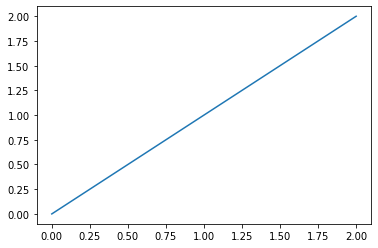

In [ ]:
x = [0,1,2]
y = [0,1,2]
plt.plot(x,y)
plt.show()

In [ ]:
x = initialize_marche()
type(x)

list